In [30]:
# %sh

# wget https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv
# mv StarWars.csv star_wars.csv

In [31]:
import sys

reload(sys)
sys.setdefaultencoding('utf8')
sys.getdefaultencoding()

In [32]:
import pandas as pd

star_wars = pd.read_csv("star_wars.csv")
print(star_wars.shape)

In [33]:
print(star_wars.head(3))

In [34]:
print(star_wars.columns)

In [35]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
print(star_wars.shape)

In [36]:
for column in list(star_wars):
#   print("{0}:".format(column))
  print(star_wars[column].value_counts(dropna=False))

In [37]:
import numpy as np

yes_no = {
  "Yes": True,
  "No": False, 
  True: True, 
  False: False, 
}

seen_columns = {
  "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1", 
  "Unnamed: 4": "seen_2", 
  "Unnamed: 5": "seen_3", 
  "Unnamed: 6": "seen_4", 
  "Unnamed: 7": "seen_5", 
  "Unnamed: 8": "seen_6"
}

seen_movies = {
  "Star Wars: Episode I  The Phantom Menace": True, 
  "Star Wars: Episode II  Attack of the Clones": True, 
  "Star Wars: Episode III  Revenge of the Sith": True, 
  "Star Wars: Episode IV  A New Hope": True, 
  "Star Wars: Episode V The Empire Strikes Back": True, 
  "Star Wars: Episode VI Return of the Jedi": True, 
  np.nan: False, 
}

# star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no, na_action="ignore")
# star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no, na_action="ignore")

def clean_columns(df, columns, mapping):
  for column in columns:
    df[column] = df[column].map(mapping, na_action="ignore")
    print(column)
    print("{0}\n".format(df[column].value_counts(dropna=False)))

clean_columns(star_wars, star_wars.columns[1:3], yes_no)
star_wars.rename(columns=seen_columns, inplace=True)
clean_columns(star_wars, star_wars.columns[3:9], dict(seen_movies.items() + yes_no.items()))

star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [38]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

ranking_columns = {
  "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1", 
  "Unnamed: 10": "ranking_2", 
  "Unnamed: 11": "ranking_3", 
  "Unnamed: 12": "ranking_4", 
  "Unnamed: 13": "ranking_5", 
  "Unnamed: 14": "ranking_6", 
}

star_wars.rename(columns=ranking_columns, inplace=True)

star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


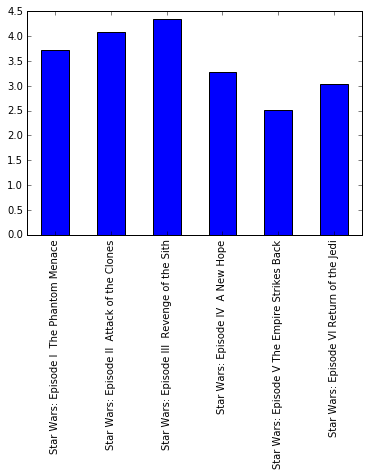

In [60]:
# Find the ranking of the movies
import matplotlib.pyplot as plt
%matplotlib inline

# Get movie names
movie_names = filter(lambda x: x is not np.nan, list(seen_movies.keys()))
movie_names.sort()

ranking = star_wars.iloc[:,9:15].mean()
ranking.index = movie_names
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ranking.plot(kind="bar")
# display(fig)
fig.show()

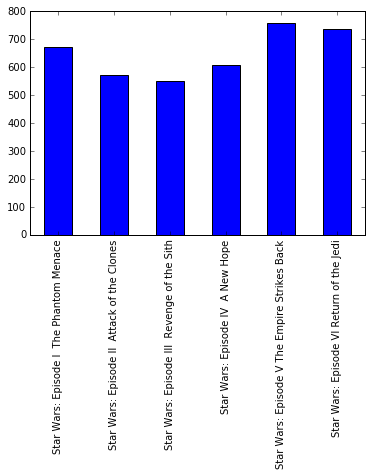

In [64]:
# Find the most seen movies
seen = star_wars.iloc[:,3:9].sum()
seen.index = movie_names

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
seen.plot(kind="bar")
# display(fig)
fig.show()

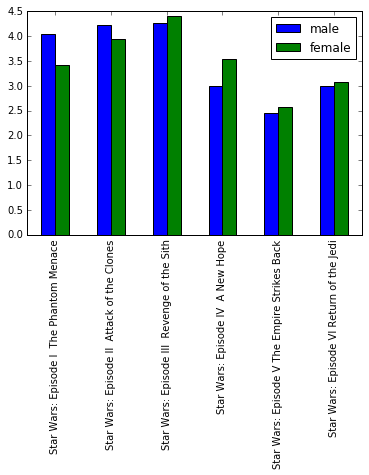

In [71]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

male_ranking = males.iloc[:,9:15].mean()
female_ranking = females.iloc[:,9:15].mean()
total_ranking = pd.concat([male_ranking, female_ranking], axis=1)
total_ranking.index = movie_names

total_ranking.plot(kind="bar")
plt.legend(["male", "female"])
# display(plt.show())
plt.show()